In [ ]:
!pip install matplotlib==3.7.1
!pip install numpy==1.25.2


In [2]:

import math
import ipywidgets as widgets
import numpy as np
import copy
import random

import pickle

import datetime


import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl



In [3]:
file_name='results_in_paper.pkl'
with open(file_name, 'rb') as f:
    variables_list=pickle.load(f)
    all_results, graph_type_to_test, centrality_type_to_test, tmax, n_list,p_list,target_infected_ratio_list,repeat_num=variables_list

In [4]:
print(graph_type_to_test, centrality_type_to_test, tmax, n_list,p_list,target_infected_ratio_list,repeat_num,sep='\n')

['random_tree', 'ER', 'WS_small_world']
['starlike_approximation', 'rumor_centrality', 'distance_centrality', 'jordan_center']
25
[50, 100, 150, 200, 250, 300]
[0.04]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
500


Customize the legend for plotting.

In [5]:
def customize_legend(c):
    if c=='starlike_approximation':
        idx_legend='Starlike tree approximation'
    elif c=='rumor_centrality':
        idx_legend='Rumor centrality with BFS'
    elif c=='distance_centrality':
        idx_legend='Distance centrality'
    elif c=='jordan_center':
        idx_legend='Jordan Center'
    else:
        idx_legend=c
    return idx_legend

### Choose the graph type for ploting the accuracy vs number of infected node.

In [6]:
j=2
GRAPH_TYPE=graph_type_to_test[j]
print("GRAPH_TYPE: ", GRAPH_TYPE)

GRAPH_TYPE:  WS_small_world


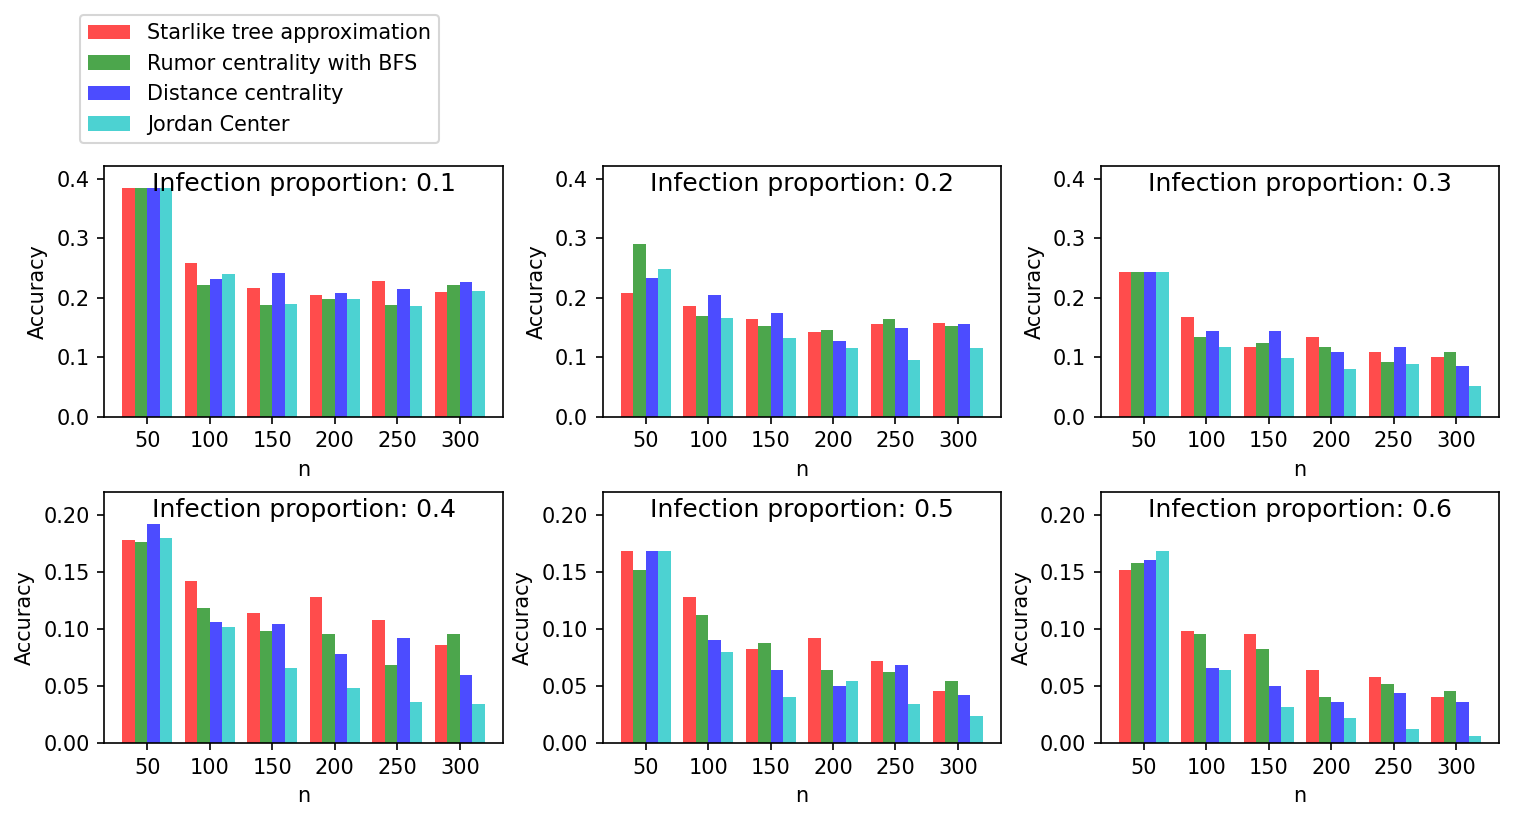

p_list:  [0.04]


In [7]:
# current code only considers the case for one element in p_list

color_list=['r','g','b','c']

statistic_list=["zero_error_rate", "one_hop_error_rate"]
STATISTIC="zero_error_rate"  # the accuracy


USE_SAME_YLIM=True
max_value=0
for centrality in centrality_type_to_test:
    max_value=max(max_value, np.nanmax(all_results[GRAPH_TYPE][centrality][STATISTIC][:,0,:]))

width=10
bar_pos_list=[i*width - (len(centrality_type_to_test)-1)/2*width for i in range(0,len(centrality_type_to_test))]
error_params=dict(elinewidth=4,ecolor='gray',capsize=5)

n_subfig=all_results[GRAPH_TYPE][centrality_type_to_test[0]][STATISTIC].shape[2]

fig, axs = plt.subplots((n_subfig)//3,3,figsize=(12, 1.7*n_subfig//2),dpi=150)

for j in range(0,n_subfig):
    for idx in range(0,len(centrality_type_to_test)):
        axs[j//3,j%3].bar(np.array(n_list)+bar_pos_list[idx], all_results[GRAPH_TYPE][centrality_type_to_test[idx]][STATISTIC][:,0,j],alpha=0.7, width=width, color=color_list[idx],label=customize_legend(centrality_type_to_test[idx]))
    
    ADD_LEGEND=True # whether to add legend
    if j==0 and ADD_LEGEND==True:
        axs[0,0].legend(bbox_to_anchor=(0.1,1,0.74,0.6), borderaxespad=0)

    axs[j//3,j%3].set_title('Infection proportion: '+str(target_infected_ratio_list[j]),y=0.85)

    axs[j//3,j%3].set_xlabel('n')
    axs[j//3,j%3].xaxis.set_major_locator(plt.MultipleLocator(50))

    axs[j//3,j%3].set_ylabel('Accuracy')
    if USE_SAME_YLIM==True:
        axs[j//3,j%3].set_ylim(0, max_value * 1.1)
    else:
        axs[j//3,j%3].set_ylim()

# adjust the y-axis of the second row of subplots
for j in range(3,n_subfig):
    axs[j//3,j%3].set_ylim(0, 0.2*1.1)

        
fig.subplots_adjust(wspace=0.25, hspace=0.3)
plt.show()


print('p_list: ', p_list)

### Choose the graph type for ploting the accuracy vs infection proportion.

In [8]:
j=1
GRAPH_TYPE=graph_type_to_test[j]
print("GRAPH_TYPE: ", GRAPH_TYPE)

GRAPH_TYPE:  ER


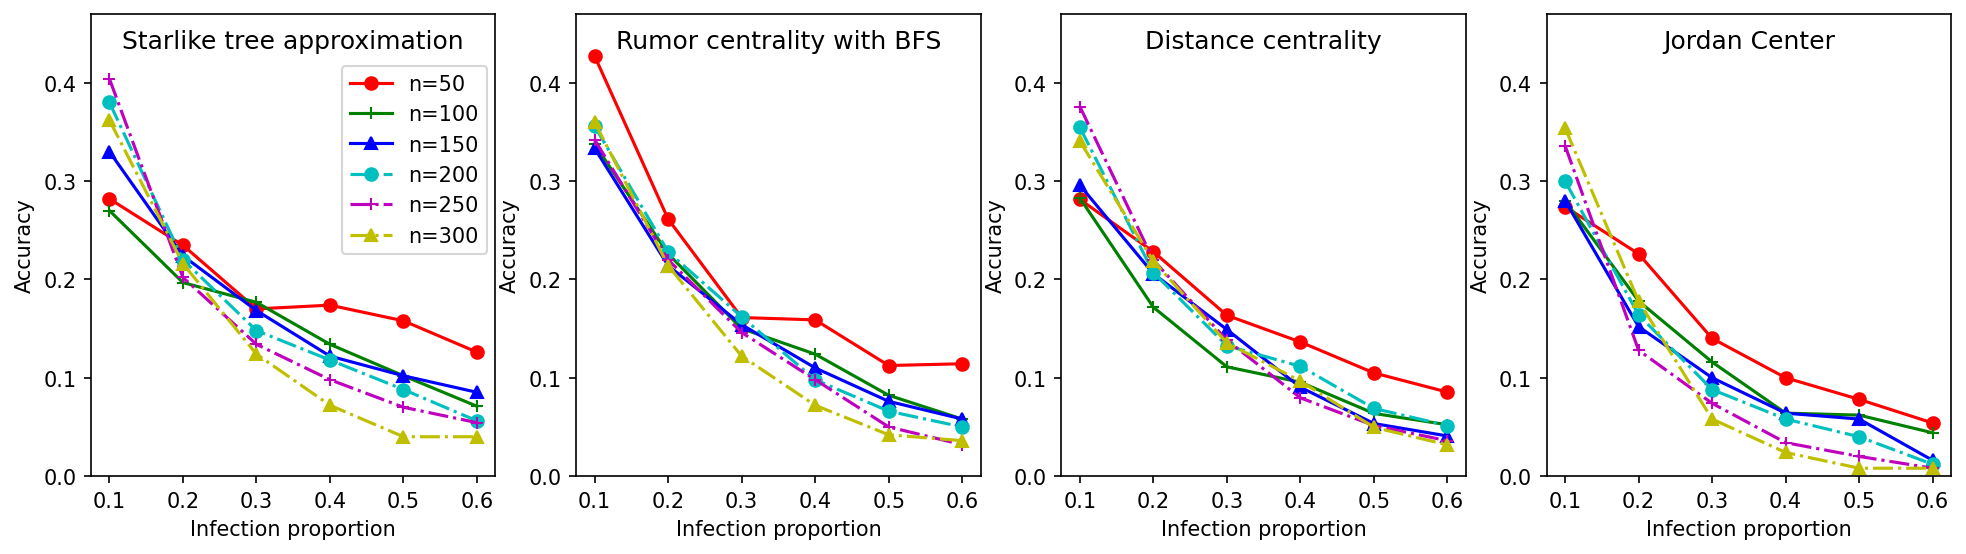

<Figure size 640x480 with 0 Axes>

In [9]:
statistic_list=["zero_error_rate", "one_hop_error_rate"]
STATISTIC="zero_error_rate" # the accuracy

USE_SAME_YLIM=True
max_value=0
for centrality in centrality_type_to_test:
    max_value=max(max_value, np.nanmax(all_results[GRAPH_TYPE][centrality][STATISTIC][:,0,:]))

fmt_list=['r-','g-','b-','c-.','m-.','y-.']
marker_list=['o','+','^','o','+','^']
# point_fmt_list=['ro-','g+-','b^-', 'co-','m+-','y^-']


n_subfig=len(centrality_type_to_test)

fig, axs = plt.subplots(n_subfig//4,4,figsize=(16, 2*n_subfig//2),dpi=150)


fig=plt.figure()
for c in range(len(centrality_type_to_test)):
    for i in range(len(n_list)):
        axs[c%4].plot(target_infected_ratio_list,all_results[GRAPH_TYPE][centrality_type_to_test[c]][STATISTIC][i,0,:],fmt_list[i],marker=marker_list[i],label='n='+str(n_list[i]))
        # axs[c%4].plot(target_infected_ratio_list,all_results[GRAPH_TYPE][centrality_type_to_test[c]][STATISTIC][i,0,:],point_fmt_list[i])
    # axs[c%4].set_title(centrality_type_to_test[c]+ ': '+ STATISTIC+' - infection proportion in ' + GRAPH_TYPE+' graph')
    axs[c%4].set_title(customize_legend(centrality_type_to_test[c]),y=0.9)
    # plt.text(0.02,0.3,'')
    axs[c%4].set_xlabel('Infection proportion')
    axs[c%4].xaxis.set_major_locator(plt.MultipleLocator(0.1))
    # axs[c%4].set_ylabel(STATISTIC)
    axs[c%4].set_ylabel('Accuracy')
    axs[c%4].yaxis.set_major_locator(plt.MultipleLocator(0.1))
    if c==0:
        axs[c%4].legend(bbox_to_anchor=(0,0.48,0.98,0.2), borderaxespad=0)
    if USE_SAME_YLIM==True:
        axs[c%4].set_ylim(0, max_value * 1.1)
    else:
        axs[c%4].set_ylim()

fig.subplots_adjust(hspace=0.3)
plt.show()